In [1]:
import xtrack as xt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
line = xt.Line.from_json('injection_lines/injection_thin_approx_ap_with_deferred_expressions.json')

#Set cavitiy voltages correctly
line['acl.31735'].frequency = 800e6
line['acl.31735'].voltage = 2 * 0.18e6
line['acl.31735'].lag = 180

line['actcse.31632'].frequency = 200e6
line['actcse.31632'].voltage = 4.5e6
line['actcse.31632'].lag = 180

tw_ref = line.twiss4d()

for name in line.element_names:
    if line[name].__class__.__name__.startswith('Limit') or line[name].__class__.__name__.startswith('Multipole'):
        #Dogleg in LSS5 for extraction
        if 'qd.51710' in name:
            line[name].shift_y = -5.273e-3
        elif 'qfa.51810' in name:
            line[name].shift_y = -17.369e-3
        elif 'qd.51910' in name:
            line[name].shift_y = -5.273e-3
        #Dogleg in LSS1 for injection
        elif 'qda.11710' in name:
            line[name].shift_x = -4.80e-3
        elif 'qfa.11810' in name:
            line[name].shift_x = -2.97e-3
        elif 'qda.11910' in name:
            line[name].shift_x = -4.80e-3
    
    elif line[name].__class__.__name__.startswith('ThinSliceQuadrupole'):
        line['qd.51710'].shift_y = -5.273e-3
        line['qfa.51810'].shift_y = -17.369e-3
        line['qd.51910'].shift_y = -5.273e-3
        line['qda.11710'].shift_x = -4.80e-3
        line['qfa.11810'].shift_x = -2.97e-3
        line['qda.11910'].shift_x = -4.80e-3


tw_before = line.twiss4d()
tt = line.get_table()

Loading line from dict:   0%|          | 0/31362 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
tt_monitors = tt.rows['bp.*'].rows['.*(?<!_entry)$'].rows['.*(?<!_exit)$']
line.steering_monitors_x = tt_monitors.name
line.steering_monitors_y = tt_monitors.name

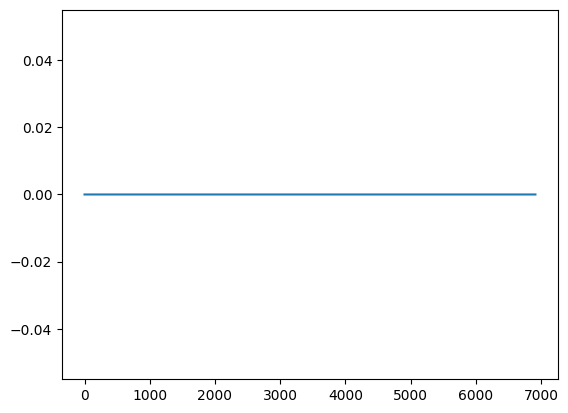

In [4]:
plt.plot(tw_ref.s, tw_ref.y)

In [5]:
tt_h_correctors = tt.rows['mdh\..*'].rows['.*h\..*']
mask_ap_h = np.array([el.startswith('Limit') for el in tt_h_correctors.element_type])
line.steering_correctors_x = tt_h_correctors.name[~mask_ap_h]

tt_v_correctors = tt.rows['mdv\..*'].rows['.*v\..*']
mask_ap_v = np.array([el.startswith('Limit') for el in tt_v_correctors.element_type])
line.steering_correctors_y = tt_v_correctors.name[~mask_ap_v]

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/q4/rcyb5f2524q8p03j88z0mxj80000gn/T/ipykernel_44830/2347040656.py:1: SyntaxWarning: invalid escape sequence '\.'
  tt_h_correctors = tt.rows['mdh\..*'].rows['.*h\..*']
/var/folders/q4/rcyb5f2524q8p03j88z0mxj80000gn/T/ipykernel_44830/2347040656.py:1: SyntaxWarning: invalid escape sequence '\.'
  tt_h_correctors = tt.rows['mdh\..*'].rows['.*h\..*']
/var/folders/q4/rcyb5f2524q8p03j88z0mxj80000gn/T/ipykernel_44830/2347040656.py:5: SyntaxWarning: invalid escape sequence '\.'
  tt_v_correctors = tt.rows['mdv\..*'].rows['.*v\..*']
/var/folders/q4/rcyb5f2524q8p03j88z0mxj80000gn/T/ipykerne

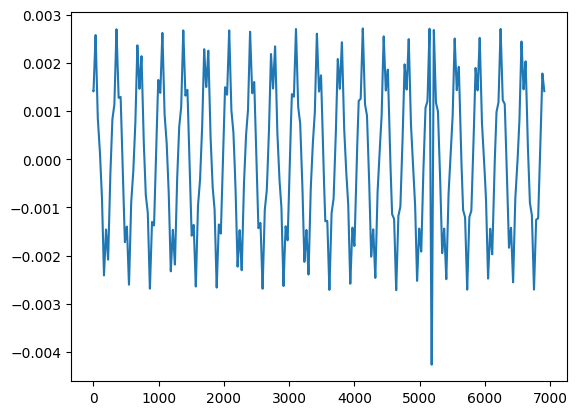

In [6]:
plt.plot(tw_before.s, tw_before.y)

In [7]:
orbit_correction = line.correct_trajectory(twiss_table=tw_ref,n_micado=5, n_iter=10)

Iteration 0, x_rms: 4.67e-06 -> 3.95e-06, y_rms: 1.56e-03 -> 5.45e-04
Iteration 1, x_rms: 3.95e-06 -> 3.53e-07, y_rms: 5.45e-04 -> 3.64e-04
Iteration 2, x_rms: 3.53e-07 -> 2.08e-07, y_rms: 3.64e-04 -> 3.39e-04
Iteration 3, x_rms: 2.08e-07 -> 5.86e-08, y_rms: 3.39e-04 -> 3.36e-04
Iteration 4, x_rms: 5.86e-08 -> 2.25e-08, y_rms: 3.36e-04 -> 3.34e-04
Iteration 5, x_rms: 2.25e-08 -> 7.26e-08, y_rms: 3.34e-04 -> 3.34e-04
Iteration 6, x_rms: 7.26e-08 -> 1.41e-08, y_rms: 3.34e-04 -> 3.34e-04
Iteration 7, x_rms: 1.41e-08 -> 1.65e-08, y_rms: 3.34e-04 -> 3.34e-04
Iteration 8, x_rms: 1.65e-08 -> 1.10e-08, y_rms: 3.34e-04 -> 3.34e-04
Iteration 9, x_rms: 1.10e-08 -> 1.38e-08, y_rms: 3.34e-04 -> 3.33e-04


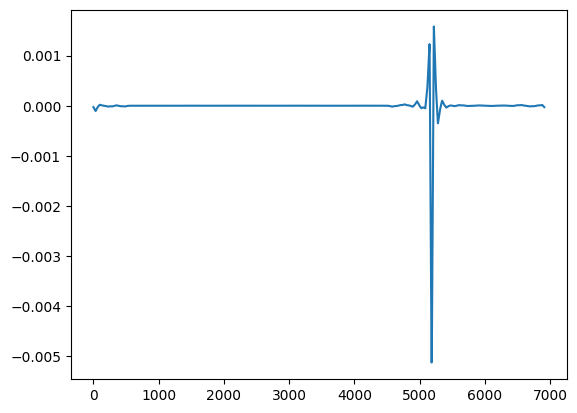

In [10]:
tw_after = line.twiss4d()
plt.plot(tw_after.s, tw_after.y)